In [42]:
import read_hdf5
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binned_statistic

In [4]:
# Mean number of "central" galaxies
#(halos with non-zero subs) per halo mass

simdir= '/cosma7/data/TNG/TNG300-1/'
snap = read_hdf5.snapshot(99, simdir)

Headername: /cosma7/data/TNG/TNG300-1/snapdir_099/snap_099.0.hdf5
Sanpname: /cosma7/data/TNG/TNG300-1/snapdir_099/snap_099


In [5]:
# Mean number of satellite galaxies per halo mass
snap.group_catalog(["GroupNsubs", "Group_M_Crit200",
                   "SubhaloMassType"])

Reading['GroupNsubs', 'Group_M_Crit200', 'SubhaloMassType']from hdf5 group catalog/cosma7/data/TNG/TNG300-1//groups_099/fof_subhalo_tab_099.
Reading file /cosma7/data/TNG/TNG300-1//groups_099/fof_subhalo_tab_099.0.hdf5
Reading file /cosma7/data/TNG/TNG300-1//groups_099/fof_subhalo_tab_099.10.hdf5
Reading file /cosma7/data/TNG/TNG300-1//groups_099/fof_subhalo_tab_099.20.hdf5
Reading file /cosma7/data/TNG/TNG300-1//groups_099/fof_subhalo_tab_099.30.hdf5
Reading file /cosma7/data/TNG/TNG300-1//groups_099/fof_subhalo_tab_099.40.hdf5
Reading file /cosma7/data/TNG/TNG300-1//groups_099/fof_subhalo_tab_099.50.hdf5
Reading file /cosma7/data/TNG/TNG300-1//groups_099/fof_subhalo_tab_099.60.hdf5
Reading file /cosma7/data/TNG/TNG300-1//groups_099/fof_subhalo_tab_099.70.hdf5
Reading file /cosma7/data/TNG/TNG300-1//groups_099/fof_subhalo_tab_099.80.hdf5
Reading file /cosma7/data/TNG/TNG300-1//groups_099/fof_subhalo_tab_099.90.hdf5
Reading file /cosma7/data/TNG/TNG300-1//groups_099/fof_subhalo_tab_099

In [15]:
m200c = snap.cat["Group_M_Crit200"][snap.cat["Group_M_Crit200"] > 0]

Text(0.5,0,'$M_{200c}$')

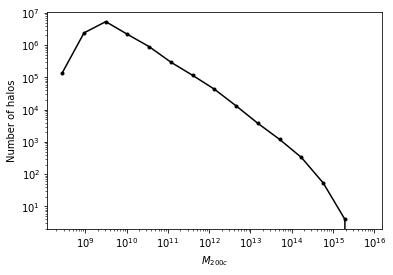

In [18]:
nbins= 15
bins = np.logspace(np.log10(np.min(m200c)),16, nbins+1)

mass_func, edges = np.histogram(m200c, bins=bins)
plt.loglog((edges[1:]+edges[:-1])/2.,
           mass_func,color='black', marker='o',markersize=3)

plt.ylabel('Number of halos')
plt.xlabel(r'$M_{200c}$')


In [24]:
group_offset = (np.cumsum(snap.cat["GroupNsubs"]) - snap.cat["GroupNsubs"]).astype(int)

In [26]:
min_halo_mass = 3.e9

In [32]:
n_galaxies = np.zeros_like(snap.cat["Group_M_Crit200"])
for halo in range(len(snap.cat["Group_M_Crit200"])):
    if snap.cat["Group_M_Crit200"][halo] > min_halo_mass :
        n_galaxies[halo] = np.sum(snap.cat["SubhaloMassType"][group_offset[halo]:group_offset[halo] \
                            + int(snap.cat["GroupNsubs"][halo]), 4] > 0.)
        

Text(0.5,0,'$M_{200c}$')

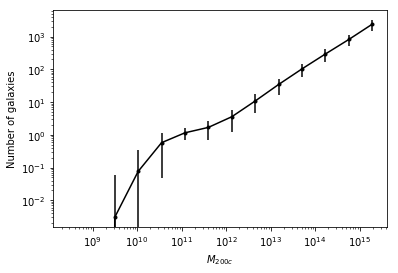

In [55]:
# Compare number of subhalos with number of galaxies

ngals, edges, _ = binned_statistic(snap.cat["Group_M_Crit200"], n_galaxies, statistic = 'mean',
                                     bins=bins)
ngals_error, edges, _ = binned_statistic(snap.cat["Group_M_Crit200"], n_galaxies, statistic = 'std',
                                     bins=bins)
fig = plt.figure()
ax = plt.axes()
ax.errorbar((edges[1:]+edges[:-1])/2.,
           ngals, yerr = ngals_error, 
             color='black', marker='o',markersize=3)

ax.set_xscale("log")
ax.set_yscale("log")

ax.set_ylabel('Number of galaxies')
ax.set_xlabel(r'$M_{200c}$')


Text(0.5,0,'$M_{200c}$')

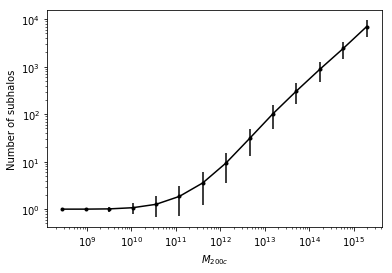

In [57]:
nsubs, edges, _ = binned_statistic(snap.cat["Group_M_Crit200"], snap.cat["GroupNsubs"]
                                   , statistic = 'mean',
                                     bins=bins)
nsubs_error, edges, _ = binned_statistic(snap.cat["Group_M_Crit200"], snap.cat["GroupNsubs"]
                                   , statistic = 'std',
                                     bins=bins)

fig = plt.figure()
ax = plt.axes()
ax.errorbar((edges[1:]+edges[:-1])/2.,
           nsubs, yerr = nsubs_error, 
             color='black', marker='o',markersize=3)

ax.set_xscale("log")
ax.set_yscale("log")

ax.set_ylabel('Number of subhalos')
ax.set_xlabel(r'$M_{200c}$')



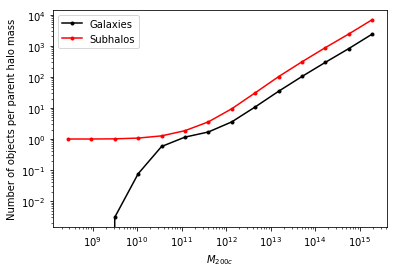

In [53]:
plt.loglog((edges[1:]+edges[:-1])/2.,
           ngals,color='black', marker='o',markersize=3,
          label='Galaxies')

plt.loglog((edges[1:]+edges[:-1])/2.,
           nsubs,color='red', marker='o',markersize=3,
          label='Subhalos')

plt.ylabel('Number of objects per parent halo mass')
plt.xlabel(r'$M_{200c}$')
plt.legend()
